In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
path = '../input/youtube-new/USvideos.csv'
data = pd.read_csv(path, index_col='video_id', parse_dates=['trending_date'])

In [3]:
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
data.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [5]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
# Handle missing value
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='constant')
imputer.fit_transform(data)
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['trending_date'] = data['trending_date'].astype('datetime64[ns]')

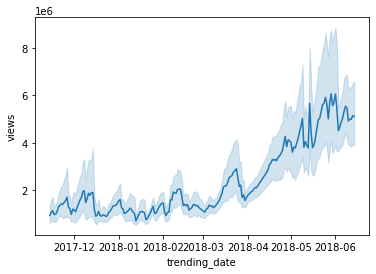

In [7]:
#trend of views every month

sns.lineplot(x='trending_date', y='views', data=data)

In [8]:
## Clear duplicate ID
data = data[~data.index.duplicated(keep='first')]
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
num_data = ['views', 'likes', 'dislikes', 'comment_count']

In [10]:
data_with_num_only = data[num_data]
data_with_num_only.head()

,views,likes,dislikes,comment_count
video_id,,,,
2kyS6SvSYSE,748374,57527,2966,15954
1ZAPwfrtAFY,2418783,97185,6146,12703
5qpjK5DgCt4,3191434,146033,5339,8181
puqaWrEC7tY,343168,10172,666,2146
d380meD0W0M,2095731,132235,1989,17518


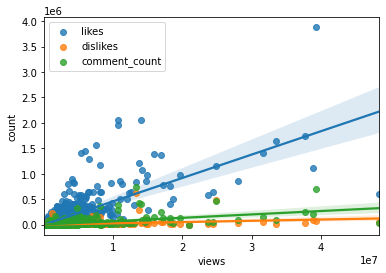

In [11]:
# corelation between views with likes, dislikes and comment
sns.regplot(x='views', y='likes', data=data_with_num_only, label='likes')
sns.regplot(x='views', y='dislikes', data=data_with_num_only, label='dislikes')
sns.regplot(x='views', y='comment_count', data=data_with_num_only, label='comment_count')
plt.ylabel('count')
plt.legend()


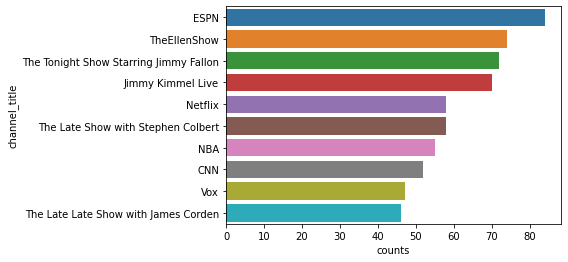

In [12]:
## ALL TIME 

# top 10 most trending channels
df = pd.DataFrame(data['channel_title'].value_counts()).head(10)

df_value_counts = df.reset_index()
df_value_counts.columns = ['channel_title', 'counts']
sns.barplot(y=df_value_counts['channel_title'], x=df_value_counts['counts'])

## we can see that ESPN is the most trending channels which have 80+ video that was a trending video according to this data

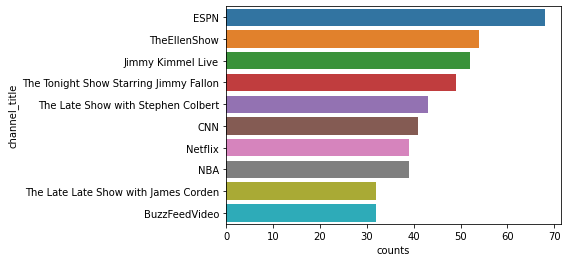

In [13]:
# # top 10 most trending channels but in 2018
data_2018 = data[(data['trending_date'] > '2018-01-01') & (data['trending_date'] <= '2020-12-30')]

df_2018 = pd.DataFrame(data_2018['channel_title'].value_counts()).head(10)

df_value_counts_2018 = df_2018.reset_index()
df_value_counts_2018.columns = ['channel_title', 'counts']
sns.barplot(y=df_value_counts_2018['channel_title'], x=df_value_counts_2018['counts'])

## still ESPN

In [14]:
## top 20 most trending tags 
tags = {}
for i in data.tags :
    for j in i.split('|') :
        if j in tags :
            tags[j] +=1
        else :
            tags[j] = 1

tags_data = pd.DataFrame({'tag' : tags.keys(), 'count' : tags.values()})
top_20_tags=tags_data.sort_values(by=['count'], ascending=False).head(20)

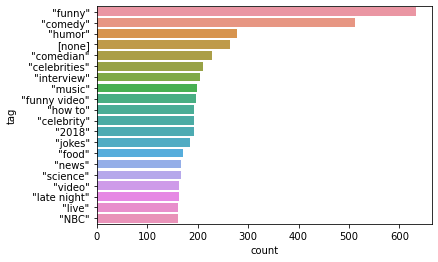

In [15]:
sns.barplot(y='tag', x='count', data=top_20_tags) 

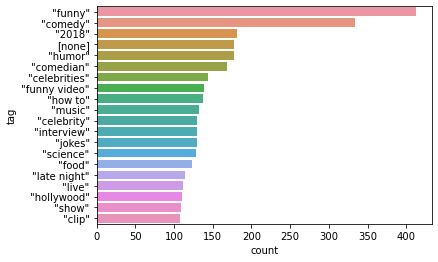

In [16]:
# in 2018
tags_2018 = {}
for i in data_2018.tags :
    for j in i.split('|') :
        if j in tags_2018 :
            tags_2018[j] +=1
        else :
            tags_2018[j] = 1

tags_data_2018 = pd.DataFrame({'tag' : tags_2018.keys(), 'count' : tags_2018.values()})
top_20_tags_2018=tags_data_2018.sort_values(by=['count'], ascending=False).head(20)
sns.barplot(y='tag', x='count', data=top_20_tags_2018) 

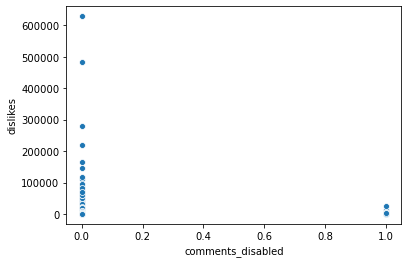

In [17]:
## comment disable and dislikes corelation
sns.scatterplot(x='comments_disabled', y='dislikes', data=data)

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

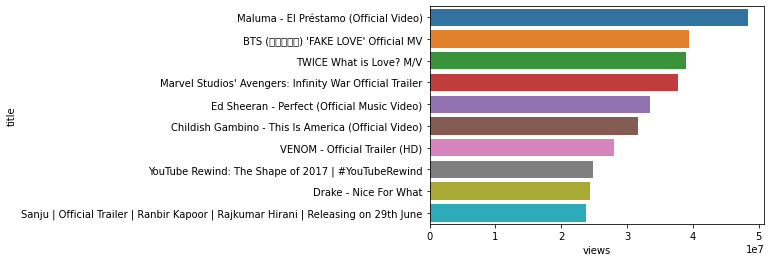

In [18]:
## Top 10 videos with most views.
top_10_views = data.sort_values(by=['views'], ascending=False).head(10)
sns.barplot(x='views', y='title', data=top_10_views)

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_

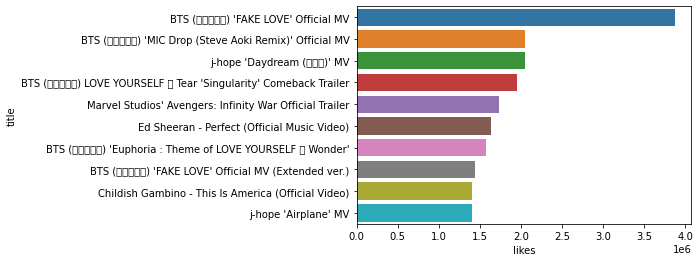

In [19]:
## top 10 most likes videos
top_10_likes = data.sort_values(by=['likes'], ascending=False).head(10)
sns.barplot(x='likes', y='title', data=top_10_likes)

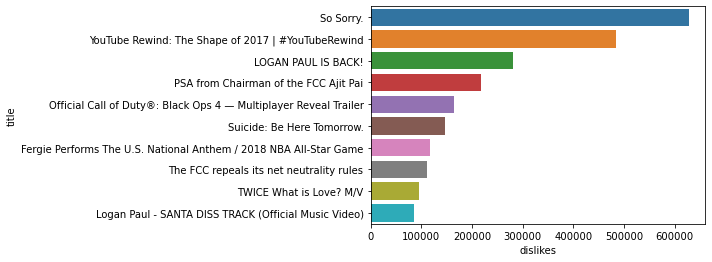

In [20]:
## top 10 most dislikes video
top_10_dislikes = data.sort_values(by=['dislikes'], ascending=False).head(10)
sns.barplot(x='dislikes', y='title', data=top_10_dislikes)

In [21]:
## frequency of top 10 most dislikes channel
top_10_dislikes[['channel_title']].value_counts()

channel_title    
Logan Paul Vlogs     4
jypentertainment     1
YouTube Spotlight    1
Washington Post      1
MLG Highlights       1
Daily Caller         1
Call of Duty         1
dtype: int64